# Capstone Project
This notebook and repo will be used for IBM's data science professional capstone course on coursera. 

In [176]:
# import dependencies
import pandas as pd 
import numpy as np
from path import Path

## Examining the data

In [177]:
# read in the data
file_path = Path("Resources/Data-Collisions.csv")
collision_df = pd.read_csv(file_path)
collision_df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [178]:
# look at all the data we have available
print(list(collision_df))

[&#39;SEVERITYCODE&#39;, &#39;X&#39;, &#39;Y&#39;, &#39;OBJECTID&#39;, &#39;INCKEY&#39;, &#39;COLDETKEY&#39;, &#39;REPORTNO&#39;, &#39;STATUS&#39;, &#39;ADDRTYPE&#39;, &#39;INTKEY&#39;, &#39;LOCATION&#39;, &#39;EXCEPTRSNCODE&#39;, &#39;EXCEPTRSNDESC&#39;, &#39;SEVERITYCODE.1&#39;, &#39;SEVERITYDESC&#39;, &#39;COLLISIONTYPE&#39;, &#39;PERSONCOUNT&#39;, &#39;PEDCOUNT&#39;, &#39;PEDCYLCOUNT&#39;, &#39;VEHCOUNT&#39;, &#39;INCDATE&#39;, &#39;INCDTTM&#39;, &#39;JUNCTIONTYPE&#39;, &#39;SDOT_COLCODE&#39;, &#39;SDOT_COLDESC&#39;, &#39;INATTENTIONIND&#39;, &#39;UNDERINFL&#39;, &#39;WEATHER&#39;, &#39;ROADCOND&#39;, &#39;LIGHTCOND&#39;, &#39;PEDROWNOTGRNT&#39;, &#39;SDOTCOLNUM&#39;, &#39;SPEEDING&#39;, &#39;ST_COLCODE&#39;, &#39;ST_COLDESC&#39;, &#39;SEGLANEKEY&#39;, &#39;CROSSWALKKEY&#39;, &#39;HITPARKEDCAR&#39;]


## What Data Do We Need?

For this analysis we are concerned about how pedestrians effect the severity of accidents. The columns we will be examining are.
* SEVERITYCODE - The severity of the accident. This is our y variable and the value we are trying to predict.
* ST_COLCODE - The code of the collision. Used to describe the accident.
* PEDCOUNT - The number of pedestrians involved in the accident.
* PERROWNOTGRNT - Whetheror not the pedestrians right of way was granted.
* SPEEDING - Was the driver speeding?


In [179]:
# pull out those columns into a new df
ped_df = collision_df[['SEVERITYCODE','PEDCOUNT',"ST_COLCODE",'PEDROWNOTGRNT',"SPEEDING"]]
ped_df.head()
ped_df.drop('ST_COLCODE', axis=1)

,SEVERITYCODE,PEDCOUNT,PEDROWNOTGRNT,SPEEDING
0,2,0,NaN,NaN
1,1,0,NaN,NaN
2,1,0,NaN,NaN
3,1,0,NaN,NaN
4,2,0,NaN,NaN
...,...,...,...,...
194668,2,0,NaN,NaN
194669,1,0,NaN,NaN
194670,2,0,NaN,NaN
194671,2,0,NaN,NaN


## Preprocessing

In [180]:
# look at the values for each category to see which ones we need to change
ped_df.PEDCOUNT.unique()

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

In [181]:
ped_df.PEDROWNOTGRNT.unique()

array([nan, &#39;Y&#39;], dtype=object)

In [182]:
ped_df.SPEEDING.unique()

array([nan, &#39;Y&#39;], dtype=object)

In [183]:
ped_df.ST_COLCODE.unique()

array([&#39;10&#39;, &#39;11&#39;, &#39;32&#39;, &#39;23&#39;, &#39;5&#39;, &#39;22&#39;, &#39;14&#39;, &#39;30&#39;, &#39; &#39;, &#39;28&#39;, &#39;51&#39;,
       &#39;13&#39;, &#39;50&#39;, &#39;12&#39;, &#39;45&#39;, &#39;0&#39;, &#39;20&#39;, &#39;21&#39;, &#39;1&#39;, &#39;52&#39;, &#39;16&#39;, &#39;15&#39;,
       &#39;74&#39;, &#39;81&#39;, &#39;26&#39;, &#39;19&#39;, &#39;2&#39;, &#39;66&#39;, &#39;71&#39;, &#39;3&#39;, &#39;24&#39;, &#39;40&#39;, &#39;57&#39;,
       &#39;6&#39;, &#39;83&#39;, &#39;25&#39;, &#39;27&#39;, &#39;4&#39;, &#39;72&#39;, &#39;29&#39;, &#39;56&#39;, &#39;73&#39;, &#39;41&#39;, &#39;17&#39;,
       &#39;65&#39;, &#39;82&#39;, &#39;67&#39;, &#39;49&#39;, &#39;84&#39;, &#39;31&#39;, &#39;43&#39;, &#39;42&#39;, &#39;48&#39;, &#39;64&#39;, &#39;53&#39;,
       32, 50, 15, 10, 14, 20, 13, 22, 51, 11, 28, 12, 52, 21, 0, 19, 30,
       16, 40, 26, 27, 83, 2, 45, 65, 23, 24, 71, 1, 29, 81, 25, 4, 73,
       74, 72, 3, 84, 64, 57, 42, 41, 48, 66, 56, 31, 82,

In [184]:
#Encoding
ped_df["SPEEDING"] = ped_df['SPEEDING'].fillna(0)
ped_df["SPEEDING"].replace('Y', 1, inplace=True)

ped_df['PEDROWNOTGRNT'] = ped_df['PEDROWNOTGRNT'].fillna(0)
ped_df["PEDROWNOTGRNT"].replace('Y', 1, inplace=True)

ped_df.head()

,SEVERITYCODE,PEDCOUNT,ST_COLCODE,PEDROWNOTGRNT,SPEEDING
0,2,0,10,0,0
1,1,0,11,0,0
2,1,0,32,0,0
3,1,0,23,0,0
4,2,0,10,0,0


In [185]:
ped_df.count()

SEVERITYCODE     194673
PEDCOUNT         194673
ST_COLCODE       194655
PEDROWNOTGRNT    194673
SPEEDING         194673
dtype: int64

In [186]:
# check data types
ped_df.dtypes

SEVERITYCODE      int64
PEDCOUNT          int64
ST_COLCODE       object
PEDROWNOTGRNT     int64
SPEEDING          int64
dtype: object

In [187]:
# drop nan values
ped_df = ped_df.dropna()

# drop values of ' '
ped_df = ped_df[ped_df['ST_COLCODE'] != ' ']

# convert the state collision code to integer
ped_df = ped_df.astype({'ST_COLCODE': 'int64'})
ped_df.dtypes

SEVERITYCODE     int64
PEDCOUNT         int64
ST_COLCODE       int64
PEDROWNOTGRNT    int64
SPEEDING         int64
dtype: object

In [188]:
# how many accidents involved pedestrians?
ped_df.groupby(by = 'PEDCOUNT').count()

,SEVERITYCODE,ST_COLCODE,PEDROWNOTGRNT,SPEEDING
PEDCOUNT,,,,
0,182830,182830,182830,182830
1,6685,6685,6685,6685
2,226,226,226,226
3,22,22,22,22
4,4,4,4,4
5,1,1,1,1
6,1,1,1,1


Since there are such a small number of accidents with pedestrians, the number of pedestrians will be transformed to a binary value.

In [189]:
ped_df["PEDCOUNT"].replace([1,2,3,4,5,6], 1, inplace=True)
ped_df.groupby(by = 'PEDCOUNT').count()

,SEVERITYCODE,ST_COLCODE,PEDROWNOTGRNT,SPEEDING
PEDCOUNT,,,,
0,182830,182830,182830,182830
1,6939,6939,6939,6939


In [190]:
ped_df.groupby(by = 'SEVERITYCODE').count()

,PEDCOUNT,ST_COLCODE,PEDROWNOTGRNT,SPEEDING
SEVERITYCODE,,,,
1,132622,132622,132622,132622
2,57147,57147,57147,57147


### How do pedestrians effect the severity of the accident?

In [191]:
ped_group_df = ped_df.copy()
ped_group_df = ped_group_df[['PEDCOUNT','SEVERITYCODE']].groupby(by='PEDCOUNT').mean()
ped_group_df.head()

,SEVERITYCODE
PEDCOUNT,
0,1.278434
1,1.899409


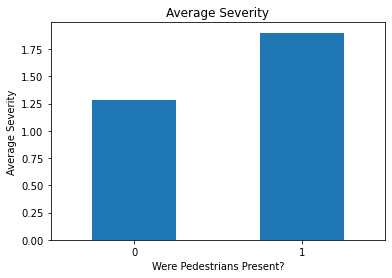

In [192]:
# Accident severity based on number of pedestrians
ped_graph = ped_group_df.plot.bar(rot=360,
                                    title = "Average Severity")
ped_graph.set_xlabel('Were Pedestrians Present?')
ped_graph.set_ylabel('Average Severity')
ped_graph.get_legend().remove()


In [193]:
# How does speeding effect severity
ped_group_df = ped_df[['SPEEDING','SEVERITYCODE']].groupby(by='SPEEDING').mean()
ped_group_df

,SEVERITYCODE
SPEEDING,
0,1.297151
1,1.378268


In [194]:
# How does pedestrian right of way effect severity
ped_group_df = ped_df[['PEDROWNOTGRNT','SEVERITYCODE']].groupby(by='PEDROWNOTGRNT').mean()
ped_group_df

,SEVERITYCODE
PEDROWNOTGRNT,
0,1.286016
1,1.901372


## Logistic Regression
The first analysis is the logistic regression model. 

In [195]:
# Separate the Features (X) from the Target (y)
y = ped_df['SEVERITYCODE']
X = ped_df.drop(columns='SEVERITYCODE')

In [196]:
# Split our data into training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1, 
                                                    stratify=y)
X_train.shape

(142326, 4)

In [197]:
# Create a Logistic Regression Model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs',
                                max_iter=200,
                                random_state=1)

In [198]:
# Fit (train) the model using the training data
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class=&#39;auto&#39;, n_jobs=None, penalty=&#39;l2&#39;,
                   random_state=1, solver=&#39;lbfgs&#39;, tol=0.0001, verbose=0,
                   warm_start=False)

In [199]:
# Make predictions
y_pred = classifier.predict(X_test)
results = pd.DataFrame({"Prediction": y_pred, "Actual": y_test}).reset_index(drop=True)
results.head(20)

,Prediction,Actual
0,1,1
1,2,2
2,1,1
3,1,1
4,1,2
5,1,1
6,1,1
7,1,2
8,1,1
9,1,1


In [200]:
# calculate the accuracy of the model
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.73612545581013


In [210]:
from sklearn.metrics import confusion_matrix
# Calculating the confusion matrix.
c_m = confusion_matrix(y_test, y_pred)


# Create a DataFrame from the confusion matrix.
c_m_df = pd.DataFrame(
    c_m, index=["Actual 1", "Actual 2"], columns=["Predicted 1", "Predicted 2"])

c_m_df

,Predicted 1,Predicted 2
Actual 1,32917,239
Actual 2,12280,2007


In [204]:
# Print the imbalanced classification report
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           1       0.73      0.99      0.84     33156
           2       0.89      0.14      0.24     14287

    accuracy                           0.74     47443
   macro avg       0.81      0.57      0.54     47443
weighted avg       0.78      0.74      0.66     47443



In [206]:
from sklearn.ensemble import RandomForestClassifier

# Create a random forest classifier.
rf_model = RandomForestClassifier(n_estimators=128, random_state=78) 
# Fitting the model
rf_model = rf_model.fit(X_train, y_train)
# Making predictions using the testing data.
predictions = rf_model.predict(X_test)

In [208]:
# Calculating the confusion matrix.
cm = confusion_matrix(y_test, predictions)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual 1", "Actual 2"], columns=["Predicted 1", "Predicted 2"])

cm_df

,Predicted 1,Predicted 2
Actual 1,32649,507
Actual 2,11223,3064


In [209]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.74      0.98      0.85     33156
           2       0.86      0.21      0.34     14287

    accuracy                           0.75     47443
   macro avg       0.80      0.60      0.60     47443
weighted avg       0.78      0.75      0.70     47443

